# CIFAR-10 Category Distribution Visualization
Showing first, middle, and last images of each category assuming ordered storage

2024-11-18 09:25:44.769040: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 09:25:45.411897: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-18 09:25:45.411992: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-18 09:25:45.536442: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-18 09:25:45.776660: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-18 09:25:45.780369: I tensorflow/core/platform/cpu_feature_guard.cc:1

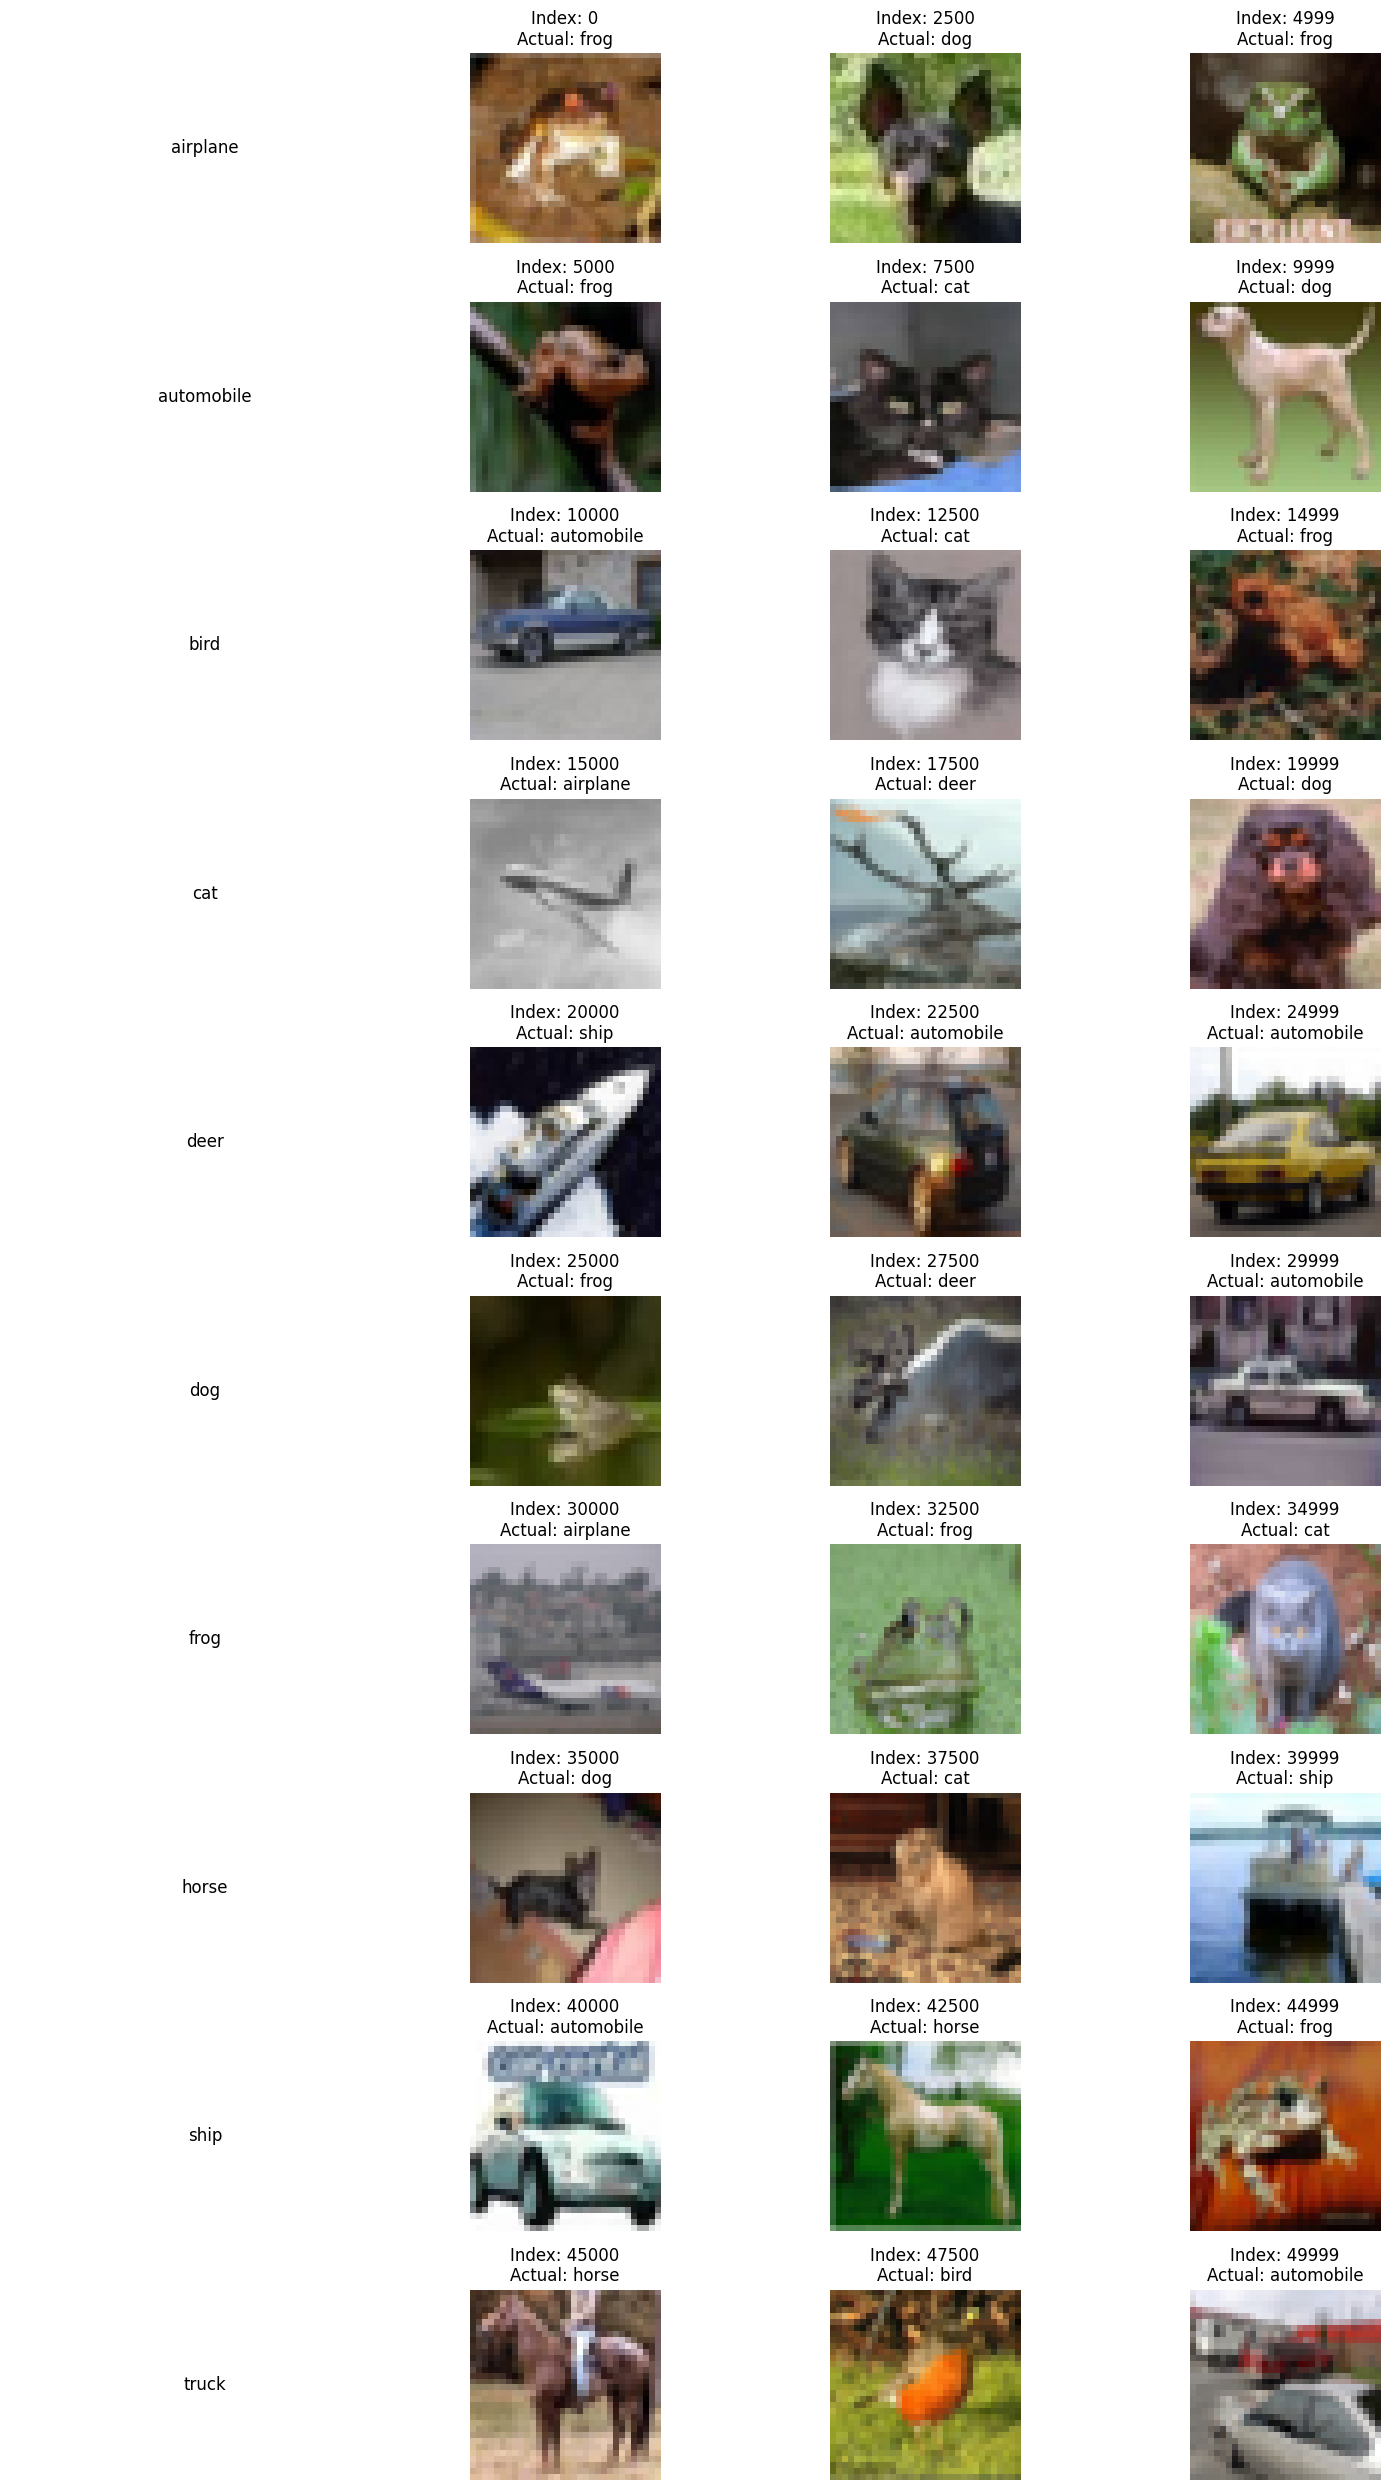

airplane: 0 - 4999
automobile: 5000 - 9999
bird: 10000 - 14999
cat: 15000 - 19999
deer: 20000 - 24999
dog: 25000 - 29999
frog: 30000 - 34999
horse: 35000 - 39999
ship: 40000 - 44999
truck: 45000 - 49999


In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), _ = tf.keras.datasets.cifar10.load_data()

# Define class names and parameters
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
images_per_class = 5000

# Create figure
plt.figure(figsize=(15, 25))

# For each category
for category_idx in range(10):
    base_idx = category_idx * images_per_class
    sample_indices = [base_idx,  # First image
                      base_idx + images_per_class//2,  # Middle image
                      base_idx + images_per_class - 1]  # Last image
    
    # Plot three images for this category
    for j, idx in enumerate(sample_indices):
        plt.subplot(10, 4, category_idx * 4 + j + 2)  # +2 to leave space for labels
        plt.imshow(x_train[idx])
        plt.title(f'Index: {idx}\nActual: {class_names[y_train[idx][0]]}')
        plt.axis('off')
    
    # Add category label on the left
    plt.subplot(10, 4, category_idx * 4 + 1)
    plt.text(0.5, 0.5, class_names[category_idx],
             rotation=0,
             horizontalalignment='center',
             verticalalignment='center',
             fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print index ranges for verification
for i, name in enumerate(class_names):
    start = i * images_per_class
    print(f"{name}: {start} - {start + images_per_class - 1}")

# Analysis of CIFAR-10 Training Set Organization

An investigation of image indices and their corresponding labels reveals that the CIFAR-10 training set is not organized categorically. Key observations:

- Images of the same class appear at scattered indices throughout the dataset
- No discernible pattern in the distribution of categories
- Examples:
  - Index 0: Contains frog (expected airplane if categorical)
  - Index 5000: Contains frog (expected automobile if categorical)
  - Index 10000: Contains automobile
  - Index 15000: Contains airplane

This random distribution suggests the training set was deliberately shuffled, likely to improve training by preventing systematic biases that could arise from processing images of the same category consecutively.

**Implication for Usage:** When working with CIFAR-10, do not assume any relationship between image indices and categories. Use the provided labels to identify image classes.